In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pint
from sympy import Matrix, symbols, atan2, pi, exp, sin, cos, sqrt, lambdify, pprint, simplify
from numpy import array, arange
import scienceplots

np.set_printoptions(precision=3, suppress=True)

plt.style.use([
    'grid',
    'retro'
])

In [100]:
m  = 840  # kg
ix = 820  # kg*meter**2
iy = 1100 # kg*meter**2
mf = 53   # kg
mr = 76   # kg

M = np.diag([m, ix, iy, mf, mf, mr, mr])

a1 = 1.4  # meter
a2 = 1.47 # meter
b1 = 0.7  # meter
b2 = 0.75 # meter

# # # # # # # # # # # # 

kf  = 1e4   # N/meter
kr  = 1.3e4 # N/meter
ktf = 2e5   # N/meter
ktr = 2e5   # N/meter
kR  = 1e4   # (N*meter/rad)
w   = 1

k11 = 2*kf+2*kr
k21 = (b1-b2)*kf+(b2-b1)*kr
k31 = 2*(a2*kr-a1*kf)

k22 = kR + (b1**2+b2**2)*kf+(b1**2+b2**2)*kr
k32 = (a1*b2-a1*b1)*kf+(a2*b2-a2*b1)*kr
k42 = -b1*kf - (1/w)*kR
k52 = b2*kf+(1/2)*kR
k33 = 2*kf*a1**2+2*kr*a2**2
k44 = kf+ktf+(1/(w**2))*kR
k55 = kf+ktf+(1/(w**2))*kR

K = np.array([
    [k11,  k21,    k31,      -kf,      -kf,    -kr,    -kr],
    [k21,  k22,    k32,      k42,      k52,  b1*kr, -b2*kr],
    [k31,  k32,    k33,    a1*kf,    a1*kf, -a2*kr, -a2*kr],
    [-kf,  k42,  a1*kf,      k44, -kR/w**2,      0,      0],
    [-kf,  k52,  a1*kf, -kR/w**w,      k55,      0,      0],
    [-kr, b1*kr, -a2*kr,       0,        0, kr+ktr,      0],
    [-kr,-b2*kr, -a2*kr,       0,        0,      0, kr+ktr]
])

# # # # # # # # # # # # 

cf = 500 # N*s/meter
cr = 500 # N*s/meter

c11 = 2*cf+2*cr
c21 = (b1-b2)*cf+(b2-b1)*cr
c31 = 2*a2*cr-2*a1*cf
c22 = (b1**2+b2**2)*cf+(b1**2+b2**2)*cr
c32 = (a1*b2-a1*b1)*cf+(a2*b2-a2*b1)*cr
c33 = 2*cf*a1**2+2*cr*a2**2

C = np.array([
    [c11,   c21,   c31,    -cf,   -cf,   -cr,    -cr],
    [c21,   c22,   c32, -b1*cf, b2*cf, b1*cr, -b2*cr],
    [c31,   c32,   c33,  a1*cf, a1*cf,-a2*cr, -a2*cr],
    [-cf,-b1*cf, a1*cf,     cf,     0,     0,      0],
    [-cf, b2*cf, a1*cf,      0,    cf,     0,      0],
    [-cr, b1*cr,-a2*cr,      0,     0,    cr,      0],
    [-cr,-b2*cr, -a2*cr,     0,     0,     0,     cr]
])

F = np.array([
    [0, 0, 0, ktf, ktf, ktr, ktr]
]).T

X0 = array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1]
])

V0 = array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
])

N = M.shape[0]

In [101]:
# Calculando M á menos meio
M_minus_half = np.vectorize(lambda x: 1/np.sqrt(x) if x != 0 else 0)(M)
M_half       = np.vectorize(lambda x: np.sqrt(x))(M)


# Calculando Ktil
K_til = M_minus_half @ K @ M_minus_half
C_til = M_minus_half @ C @ M_minus_half

wn, P = np.linalg.eig(K_til)
wn    = np.sqrt(wn)

S     = M_minus_half @ P
S_inv = P.T@M_half

Y     = P.T@C_til@P
Y     = Y / (2*wn)
zetas = array([Y[i,i] for i in range(N)])

wds   = wn * np.sqrt(1-zetas**2)
wds   = np.real(wds)

In [102]:
print('wn: ', wn)
print('wd: ', wds)
print('zeta: ', zetas)
print(' ')
print('P: \n', P)
print(' ')
print('S: \n', S)
print(' ')
print('S_inv: \n', S_inv)

wn:  [ 9.199  6.997  6.179 62.97  65.893 52.989 52.95 ]
wd:  [ 9.054  6.909  6.154 62.782 65.72  52.874 52.845]
zeta:  [0.177 0.157 0.089 0.077 0.072 0.066 0.063]
 
P: 
 [[-0.278 -0.959 -0.049  0.017 -0.    -0.027  0.   ]
 [-0.041  0.063 -0.997  0.004 -0.023 -0.001 -0.019]
 [-0.959  0.275  0.056 -0.021  0.    -0.034  0.   ]
 [ 0.01  -0.014 -0.021 -0.706  0.708  0.001 -0.001]
 [ 0.012 -0.017  0.012 -0.708 -0.706  0.001  0.001]
 [-0.028 -0.012  0.014  0.001 -0.001  0.7   -0.713]
 [-0.029 -0.01  -0.014  0.     0.001  0.713  0.701]]
 
S: 
 [[-0.01  -0.033 -0.002  0.001 -0.    -0.001  0.   ]
 [-0.001  0.002 -0.035  0.    -0.001 -0.    -0.001]
 [-0.029  0.008  0.002 -0.001  0.    -0.001  0.   ]
 [ 0.001 -0.002 -0.003 -0.097  0.097  0.    -0.   ]
 [ 0.002 -0.002  0.002 -0.097 -0.097  0.     0.   ]
 [-0.003 -0.001  0.002  0.    -0.     0.08  -0.082]
 [-0.003 -0.001 -0.002  0.     0.     0.082  0.08 ]]
 
S_inv: 
 [[ -8.046  -1.163 -31.802   0.074   0.084  -0.244  -0.254]
 [-27.792   1.811   9.1

In [103]:
# condições iniciais inversas modais
r_0     = (S_inv@X0)
r_dot_0 = (S_inv@V0)

pprint(r_0)
print(' ')
pprint(r_dot_0)

[[-0.254] 
 [-0.091] 
 [-0.119] 
 [ 0.003] 
 [ 0.005] 
 [ 6.214] 
 [ 6.108]]
 
[[0.] 
 [0.] 
 [0.] 
 [0.] 
 [0.] 
 [0.] 
 [0.]]


In [104]:
# Calculando as soluções modais desacopladas
t = symbols('t')

r = []

B = np.eye(N)

F = P.T @ M_minus_half @ B @ F
wf = 30

for i in range(N):
    w    = wn[i]
    wd   = wds[i]
    zeta = zetas[i]
    
    r_zero    = r_0    [i, 0]
    rdot_zero = r_dot_0[i, 0]

    Ai = sqrt(
        ( (r_zero * wd)**2 + (rdot_zero + zeta*w*r_zero)**2 ) / (wd**2)
    )

    phi_i = atan2(
        (r_zero*wd),(rdot_zero + zeta*w*r_zero)
    )

    if rdot_zero == 0:
        phi_i = pi/2
    
    expr_r = Ai*exp(-zeta*w*t)*sin(wd*t + phi_i)

    f0 = F[i]
    A0 = f0 / sqrt( (w**2 - wf**2)**2 + (2*zeta*w*wf)**2 )

    theta = atan2( (2*zeta*w*wf), (w**2 - wf**2) )

    if (w**2 - wf**2) == 0:
        theta = pi/2
        
    expr_r += A0*cos(wf*t - theta)
    
    r.append(
        expr_r
    )

R = Matrix(r)
x_t = S@R

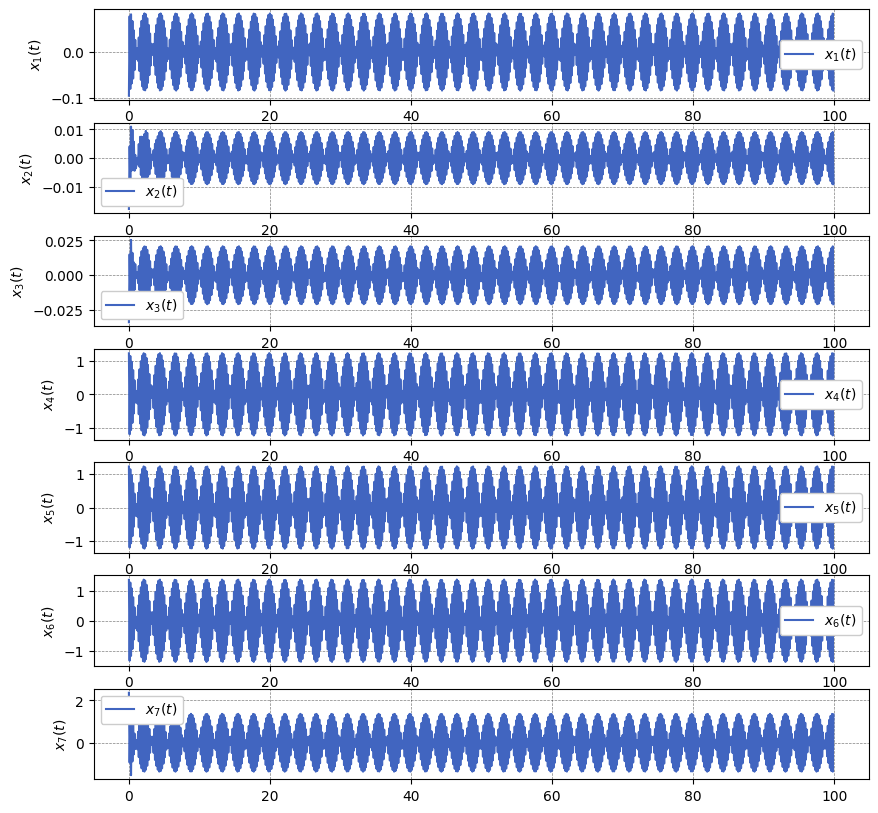

In [105]:
# Simulação

sampling_period = 1e-1
samples = 10000

time = arange(0, samples*sampling_period, sampling_period)

x = [lambdify(t, x_t[i,0], 'numpy') for i in range(N)]

xi = [x[i](time) for i in range(N)]

fig, ax = plt.subplots(N, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.25)

idx = 1000

for i in range(N):
    ax[i].plot(time[:idx], xi[i][:idx], label=f'$x_{i+1}(t)$')
    ax[i].set_ylabel(f'$x_{i+1}(t)$')
    ax[i].legend()

# plt.savefig('imagens/forced_response.png', dpi=300)

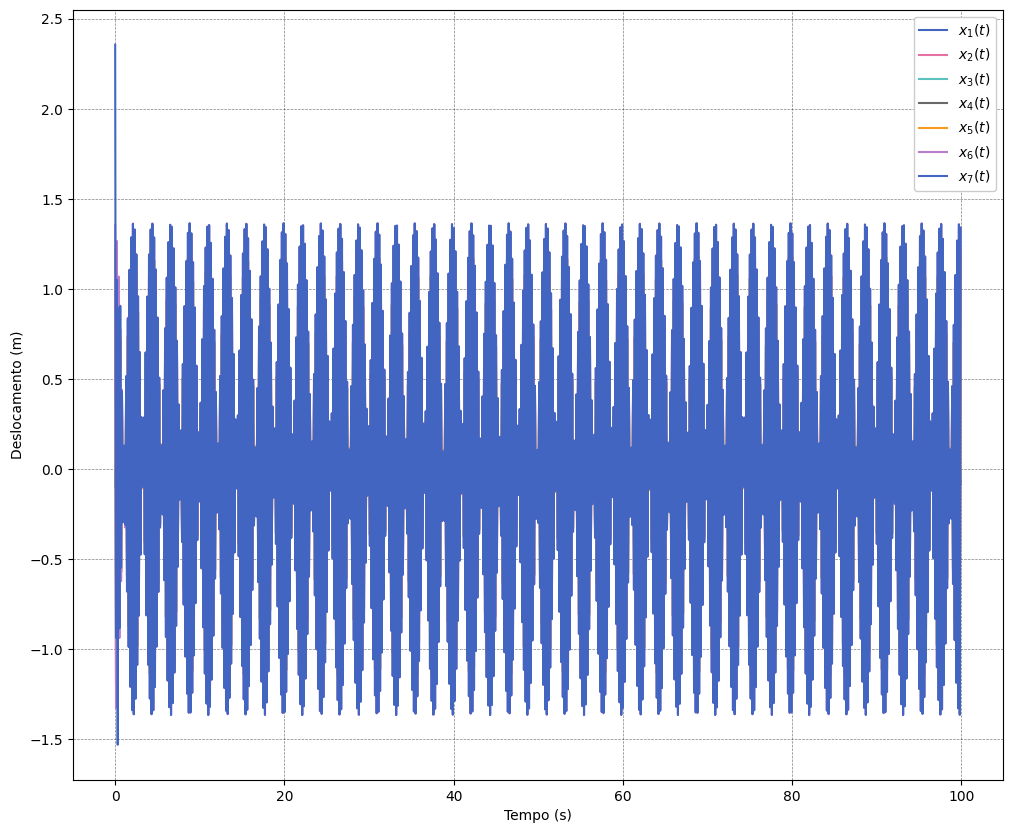

In [106]:
plt.figure()

for i in range(N):
    plt.plot(time[:idx], xi[i][:idx], label=f'$x_{i+1}(t)$')

plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')

plt.legend()

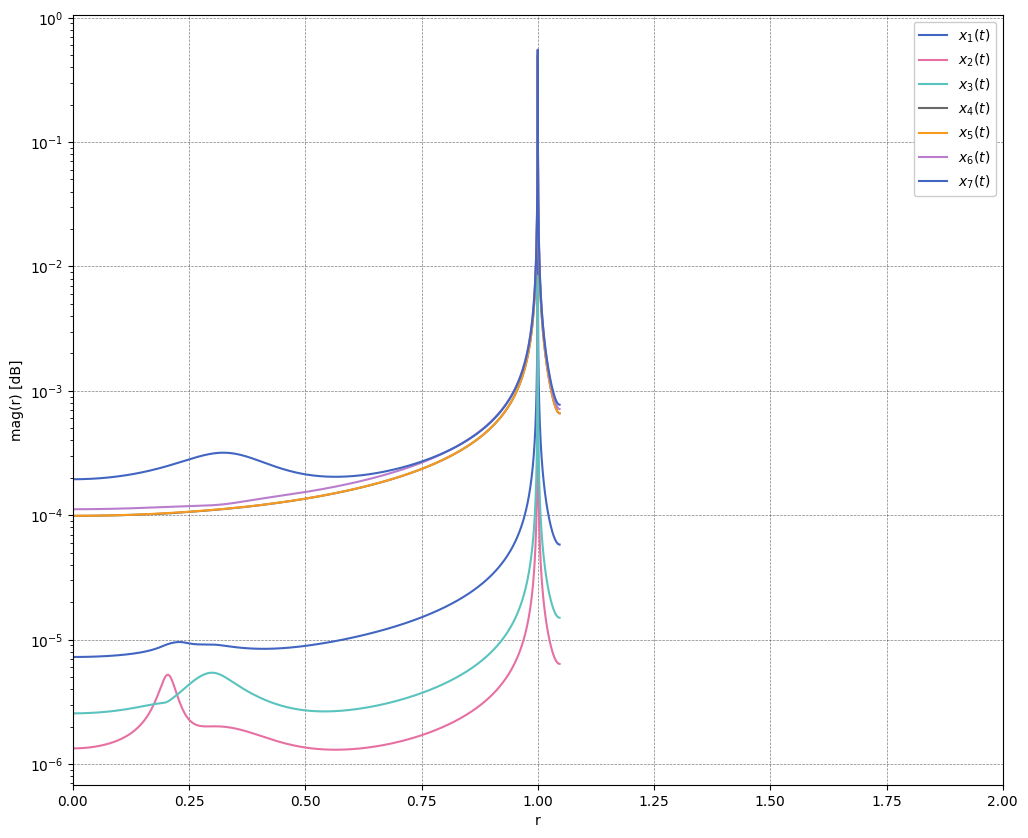

In [107]:
def fft(signal, sampling_time):
    fft = np.fft.fft(signal)
    N = signal.shape[0]

    f = np.fft.fftfreq(len(signal), sampling_time)

    K = N // 2

    freqs = f[:K]*2*np.pi
    amplitudes = np.abs(fft)[:K] * (1 / N)

    phase = np.rad2deg(np.angle(fft)[:K])

    return freqs, amplitudes, phase


ffts   = [fft(xi[i], sampling_period) for i in range(N)]

maximum_amp = np.max([
    np.max(ffts[i][1]) for i in range(N)
])

maximum_freq = np.max(
    [ffts[i][0][np.argmax(ffts[i][1])] for i in range(N)]
)

plt.figure()
plt.semilogy()

for i in range(N):

    plt.plot(
        ffts[i][0]/maximum_freq,
        ffts[i][1],
        label=f'$x_{i+1}(t)$'
    )

plt.xlim(.0, 2)
plt.xlabel('r')
plt.ylabel('mag(r) [dB]')
plt.legend()

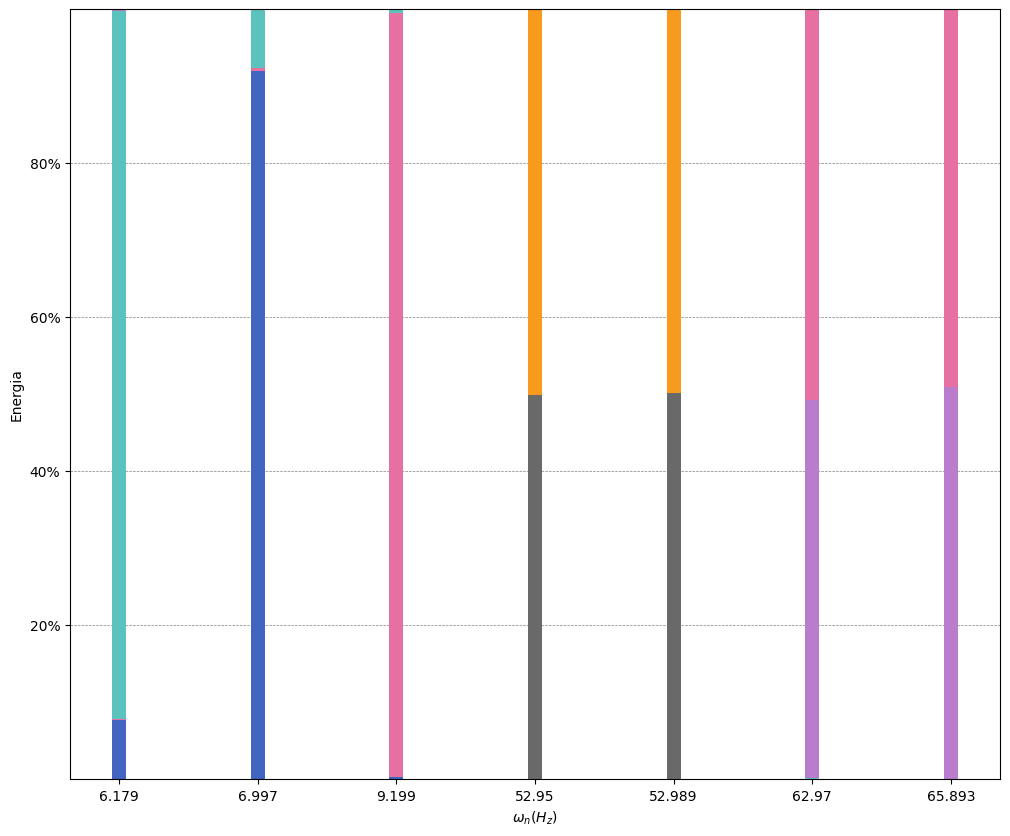

In [108]:
# for each eigenvalue ( natural frequency ), plot an bar
# of the energy of the system at that frequency with the eigenvector


colors = ['C6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C0']

wn = sorted(wn, reverse=True)

plt.rcParams['figure.figsize'] = (12, 10)
plt.figure()
for i in range(len(wn)):
    w = wn[i]
    p = np.abs(P[:, i])**2

    for j in range(len(p)):
        plt.bar((i+1), p[j], bottom=np.sum(p[:j]), width=0.1, color=colors[j])


plt.xlabel(r'$\omega_n (H_z)$')
plt.ylabel('Energia')

# y ticks in percentage
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x*100:.0f}%')
plt.xticks(range(N, 0, -1), np.round((wn), 3))

# plt.legend([r'$m$', r'$i_x$', r'$i_y$', r'$m_f$', r'$m_r$'])
plt.savefig('energyhc.png', dpi=300)